#ENGG*6600: Special Topics in Information Retrieval - Fall 2022
##Assignment 2: Text Processing and Indexing (Total : 100 points)

**Description**

This is a coding assignment where you will implement an inverted index with count information. Basic proficiency in Python is recommended.  

**Instructions**

* To start working on the assignment, you would first need to save the notebook to your local Google Drive. For this purpose, you can click on *Copy to Drive* button. You can alternatively click the *Share* button located at the top right corner and click on *Copy Link* under *Get Link* to get a link and copy this notebook to your Google Drive.  

*   For questions with descriptive answers, please replace the text in the cell which states "Enter your answer here!" with your answer. If you are using mathematical notation in your answers, please define the variables.
*   You should implement all the functions yourself and should not use a library or tool for the computation.
*   For coding questions, you can add code where it says "enter code here" and execute the cell to print the output.
* To create the final pdf submission file, execute *Runtime->RunAll* from the menu to re-execute all the cells and then generate a PDF using *File->Print->Save as PDF*.
Make sure that the generated PDF contains all the codes and printed outputs before submission.
To create the final python submission file, click on File->Download .py.


**Submission Details**

* Due data: Oct. 21, 2022 at 11:59 PM (EST).
* The final PDF and python file must be uploaded on CourseLink.
* After copying this notebook to your Google Drive, please paste a link to it below. Use the same process given above to generate a link. ***You will not recieve any credit if you don't paste the link!*** Make sure we can access the file.
***LINK: *https://colab.research.google.com/drive/1frCLeV40wf2utpTJLlMgUZJX4tg2hbR9?usp=sharing***

**Academic Honesty**

Please follow the guidelines under the *Collaboration and Help* section in the first lecture.     

# Download input files

Please execute the cell below to download the input files.

In [ ]:

import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


import os
import zipfile

download = drive.CreateFile({'id': '1YoRCcM8bt3Dy9mgsCwYoy9EpWQzGjOyj'})
download.GetContentFile('HW02.zip')

with zipfile.ZipFile('HW02.zip', 'r') as zip_file:
    zip_file.extractall('./')
os.remove('HW02.zip')
# We will use hw1 as our working directory
os.chdir('HW02')

#Setting the input file
col = "antique-collection.tok.clean_kstem"

# 1 : Inverted Index Construction (40 points)
We use the collection from the ANTIQUE  [https://arxiv.org/pdf/1905.08957.pdf] dataset for this assignment. As described in the previous assignment, this is a passage retrieval dataset and the collection consists of passages. Each row of the file consists of the following information:

*passage_id  passage_text*

The passage_id and passage_text information is tab ('\t') separated. The passage text has been pre-processed to remove punctutation, tokenised and stemmed using the Krovetz stemmer. The terms in the passage text can be accessed by splitting the text based on space.





Question 1.1 (15 points)

In the cell below, you have to implement the following:

1) Create new integer passage ids ranging from [1-num of passages in the collection], corresponding to each passageId given in the input collection file, for eg: the passageId in the first row would correspond to 1, the one on the second row would correspond to 2 and so on. Please store this in a data structure which could be accessed in subsequent cells. Please note that the collection could contain passageIds with no corresponding text information. While reading the collection file, you may need to handle this scenario.

2) An inverted index with count information. An example is given in Section 5.3.2 of the reference book : "Search Engines: Information Retrieval in Practice". A typical entry (posting) in this type of inverted index would consist of a term followed by the set of passages in which it occurs along with number of times it occured within each of them. For eg: if a term "fish" occured in two passages with ids: "4" and "10" and corresponding frequencies "1" and "2", the entry for "fish" would look like this.

*fish  4:1 10:2*

Please note that the passage ids within the index must correspond to the newly created passage ids. For a particular term, the passage ids must be sorted in ascending order (small->large), like the example given above (where "4" is less than "10").

Besides the term count information, the index must also contain the statistics such as total number of tokens in the collections and total number of unique terms.

Real-world indices are typically very large and cannot be stored in memory, however the collection provided for this assignment is fairly small and can be easily loaded into memory.


In [ ]:
''' counts unique word in a single line and returns the total number'''
import pandas as pd

def count_words(s):
    x = {}
    p = s.split(" ")
    for i in p:
        if i in x:
            x[i] += 1
        else:
            x[i] = 1

    return len(x)

In [ ]:
'''
In this function, create inverted index with count information
Return Variables:
indexCount - Datastructure used for holding the inverted index with count information.
             Please note that besides the term posting list, you must also store information
             such as total number of tokens in the collections, total number of unique terms
             and total number of unique passages in the collection (This would also include any
               potential passagIds with empty text).
numPassages - Total number of unique passages in the collection.
              You can return the count stored within the index.
docMap -  datastructure which maps newly created passage ids to original passage ids.
          ie eg: 1 ->"2020338_0", 2->"2020338_1"
'''

def createIndexCount(col):
    uni_n ={}
    column_name = ['passage_id','passage']
    df = pd.read_csv(col,sep='\t',names=column_name, skipinitialspace=True)
    Numpassages = df['passage_id'].nunique()

    ''' empty array to store a key and value pair for the words'''
    invindex = {}
    for i in range(len(df)):
        for j in df['passage'][i].split(" "):
            if j not in invindex:
                invindex[j] = {}
            invindex[j][i] = 0
    for i in range(len(df)):
        for j in df['passage'][i].split(" "):
            invindex[j][i] = invindex[j][i] + 1

    para_count = {}
    unique_count = {}
    for i in range(len(df)):
        para_count[i] = len(df['passage'][i].split(" "))
        unique_count[i] = count_words(str(df['passage'][i]))

    indexCount = {"count":invindex,"para_count":para_count,"unique_count":unique_count}

    for i in range(len(df)):
        uni_n[i] = df['passage_id'][i]
    docMap = uni_n




    return indexCount, Numpassages, docMap


''' this is an example. You can return additional information based on your implementation.'''

indexCount, numPassages, docMap = createIndexCount(col)

#sanity check
print ('Total number of passages in the collection :{0}'.format(numPassages))


Total number of passages in the collection :403492


Question 1.2 (10 points)

Please give a short description of your implementation of the index including how the postings are stored within the index.  

there are 2 dataframes invindex and docMap. Invdex is constructed for stroring posting list, total number of unique terms and unique passages. while docmap is ued to map newly created index with existing index.

Question 1.3 (10 points)

In the cell below, you have to implement an index with delta encoding. Please note that delta encoding is done only for passage ids and not for term count information. Instead of reading through the entire collection file again, you can use the index created above to generate the new index.

In [ ]:
'''
In this function, create inverted index with count information and delta encoded passage ids.
Return Variables:
indexDelta - Datastructure used for holding the new inverted index with count information.
             Please note that you must also store information such as total number of tokens,
             total number of unique terms and total number of unique passages in the collection.
             (This would also include any potential passagIds with empty text)
numPassages - Total number of unique passages in the collection.
              You can return the count stored within the index.
'''
def createIndexDeltaCount(indexCount):
    #enter your code here
    #enter your code here
     indexDelta = {}
     x = {}
     x1 = []

     for n in indexCount['count']:
        t = list(indexCount['count'][n].keys())
        o = list(indexCount['count'][n].values())
        x1 = []
        if len(t) == 1:
            x1.append((t[0], o[0]))
        else:
            for i in range(len(t)):
                if i == 0:
                    x1.append((t[i],o[i]))

                else:

                    x1.append(((t[i] - t[i-1]),o[i]))



        x[n] = x1


     indexDelta = {'count':x,"para_count":indexCount["para_count"],"unique_count":indexCount['unique_count']}

     return indexDelta, numPassages

''' this is an example. You can return additional information based on your implementation.'''
indexDelta, numPassages = createIndexDeltaCount(indexCount)

#sanity check
print ('Total number of passages in the collection :{0}'.format(numPassages))

Total number of passages in the collection :403492


Question 1.4 (5 points)

Please give a short description of delta encoding.

Delta encoding is a way of storing or transmitting data in the form of differences between sequential data rather than complete files.
in simple words, Delta encoding compreses data by recording the difference between values that follow each other in the column.

# 2 : Accessing Index Information (30 points)



In the cell below, implement functions which would take an index and term as input and access the passage id and count information. For the delta encoded version, you have to decode the delta encoding.


In [ ]:
'''
In this function, access the inverted index with count information and return passage id
and and count information.
Return Variables:
termFreqIndexCount - Number of passages containing input term "term"
passageListCount -  First 5 passageIds(original passage ids) in the postings list.
                    To return original passage ids, you can use docMap.
'''
def accessTermInfoIndex(term, indexCount, docMap):
  passageListCount = []
  termFreqIndexCount = len(indexCount['count'][term])
  p_num = list(indexCount['count'][term].keys())
  for i in range(5):
      loc = p_num[i]

      passageListCount.append(docMap[loc])


  return termFreqIndexCount, passageListCount

'''
In this function, access the inverted index with count information and delta encoded passage ids
and return passage ids and count information.
Return Variables:
termFreqIndexCount - Number of passages containing input term "term"
passageListCount -  First 5 passageIds(original passage ids) in the postings list for the input "term".
                    You have to decode the delta encoding and then map to original ids using docMap.
'''
def accessTermInfoIndexDelta(term, indexDelta, docMap):
  #enter your code here
  #enter your code here
  passageListDelta = []
  termFreqIndexDelta = len(indexDelta['count'][term])
  p_num = indexDelta['count'][term]
  y = p_num[0][0]
  for i in range(5):
    if i == 0:
      passageListDelta.append(docMap[p_num[i][0]])
    else:
      y = p_num[i][0]+ y

      passageListDelta.append(docMap[y])


  return termFreqIndexDelta, passageListDelta


termFreqIndexCount, passageListCount  = accessTermInfoIndex("computer",indexCount,docMap)
termFreqIndexDelta, passageListDelta   = accessTermInfoIndexDelta("computer",indexDelta,docMap)

# check output for a term. Please make that the final pdf displays all the outputs.
print ("Index term information")
print ('Total number of Passages containing the term "computer" :{0}'.format(termFreqIndexCount))
print ('First 5 passages with the term "computer" :{0}'.format(passageListCount))
print ("**************************************************************************************")
print ("Index term information with delta encoding")
print ('Total number of Passages containing the term "computer" :{0}'.format(termFreqIndexDelta))
print ('First 5 passages with the term "computer" :{0}'.format(passageListDelta))


Index term information
Total number of Passages containing the term "computer" :2718
First 5 passages with the term "computer" :['629558_0', '1528314_0', '3384343_0', '1873488_1', '2084699_0']
**************************************************************************************
Index term information with delta encoding
Total number of Passages containing the term "computer" :2718
First 5 passages with the term "computer" :['629558_0', '1528314_0', '3384343_0', '1873488_1', '2084699_0']


# 3 : Display Index Statistics (10 points)


In the cell below, please create APIs to access various statistics from the index.

In [ ]:
'''
In this function, access the inverted index with count information and return term statistics
Return Variables:
totNumTerms - Total number of tokens in the collection stored in the index
totNumUniqueTerms -  Total number of unique terms stored in the index
'''

def displayIndexStats(indexCount):
    #enter your code here
    t = 0
    for i in indexCount['para_count'].values():
        t = t + i
    totNumTerms = t
    totNumUniqueTerms = len(indexCount['count'])


    return totNumTerms, totNumUniqueTerms

'''
In this function, access the inverted index with count information and delta encoded passagesIds
and return term statistics
Return Variables:
totNumTerms - Total number of tokens in the collection stored in the index
totNumUniqueTerms -  Total number of unique terms stored in the index
'''
def displayIndexDeltaStats(indexDelta):
    #enter your code here
    t = 0
    for i in indexDelta['para_count'].values():
        t = t + i
    totNumTerms = t
    totNumUniqueTerms = len(indexDelta['count'])
    return totNumTerms, totNumUniqueTerms

totNumTermsIndexCount, totNumUniqueTermsIndexCount = displayIndexStats(indexCount)
totNumTermsIndexDelta, totNumUniqueTermsIndexDelta = displayIndexDeltaStats(indexDelta)

#printing the output
print ("Index Statistics from IndexCount")
print ('Total number of Unique Terms :{0}'.format(totNumUniqueTermsIndexCount))
print ('Total number of tokens :{0}'.format(totNumTermsIndexCount))
print ("**************************************************************************************")
print ("Index Statistics from IndexDelta")
print ('Total number of Unique Terms :{0}'.format(totNumUniqueTermsIndexDelta))
print ('Total number of tokens :{0}'.format(totNumTermsIndexDelta))

Index Statistics from IndexCount
Total number of Unique Terms :149467
Total number of tokens :16590057
**************************************************************************************
Index Statistics from IndexDelta
Total number of Unique Terms :149467
Total number of tokens :16590057


# 4 : Zipf's law (20 points)

Question 4.1 (5 points)

Briefly describe Zipf's law.

Zipf's Law defines as a probability distribution where each frequency is the reciprocal of its rank multiplied by the highest frequency.

Zipf’s law, in probability, assertion that the frequencies f of certain events are inversely proportional to their rank r.

Question 4.2 (10 points)

In the cell below, find the frequency of terms in the vocabulary. Convert these to probability values by dividing the term frequency by the total number of tokens.  Also display the rank*probability values for the top 20 most frequent terms (sorted with respect to their frequency in descending order) where rank corresponds to the frequency ranking of the terms.


In [ ]:
'''
In this function, calculate term probability and rank*probability values.
Return Variables:
termProb - term probabilities of all terms in the vocabulary
rtermProb -  product of rank and probabilities of top 20 most frequent terms
'''
def zipf(indexCount):
        t = 0
        for i in indexCount['para_count'].values():
            t = t + i

        termProb = {}
        value = list(indexCount['count'].keys())
        for i in value:
            a = sum(indexCount['count'][i].values())

            termProb[i] = (a / t)



        sort_values = sorted(termProb.values(),reverse=True)


        rtermProb = {}
        for j in range(20):
            for i in termProb.keys():
                if termProb[i] == sort_values[j]:
                    rtermProb[i] = (j+1) * termProb[i]

        return  termProb, rtermProb

# You can pass any additional variables needed for the calculation
termProb, rtermProb = zipf(indexCount)

'''print the rank* term probabilities. Please make that the final pdf displays all the outputs.
'''
print ('rank * Term Frequency Prob Values for top 20 most frequent terms :{0}'.format(rtermProb))

rank * Term Frequency Prob Values for top 20 most frequent terms :{'the': 0.04563558762938548, 'to': 0.05512024461398776, 'and': 0.07475218439574982, 'a': 0.09750563243996088, 'you': 0.10236522996876984, 'of': 0.11890158062748067, 'it': 0.13207338588408707, 'is': 0.142201801958848, 'in': 0.12853301227355637, 'that': 0.13456192465161512, 'i': 0.13849078396777056, 'are': 0.1114752046964034, 'do': 0.11339189491633452, 'for': 0.11708398590794475, 'they': 0.12210898371235251, 'have': 0.12501271092679186, 'your': 0.125374313059925, 'or': 0.12743500519618467, 'be': 0.1297767693022393, 'not': 0.13407910533399614}


Question 4.3 (5 points)

In the cell below, use the term probability and rank information of all terms in the vocabulary calculated in the previous question, and plot a graph with the log(probability) as y-axis and log(rank) as x-axis where rank corresponds to the frequency ranking of the terms. This must be plotted for all the terms.

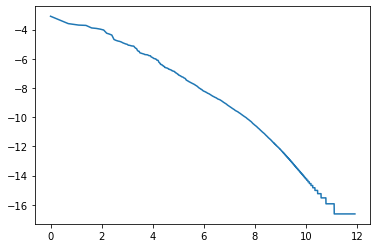

In [ ]:
# enter code here to plot the curve
from math import log
import matplotlib.pyplot as plt
sort_values = sorted(termProb.values(),reverse=True)
n = []
n1 = []
r = 1
for i in sort_values:
    n.append(log(r))
    r = r +1
    n1.append(log(i))

plt.plot(n,n1)